In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
xls_data=pd.read_excel("./table.xlsx")

In [3]:
t2_dat=xls_data.loc[:,"# of turns":"HFSS"]

In [4]:
t4_dat=xls_data.loc[:,"# of turns.2":"HFSS.2"]

In [5]:
t2_dat=t2_dat.replace(np.nan,0)
t4_dat=t4_dat.replace(np.nan,0)

In [6]:
def data_restore(dat):
    for col_name in dat.columns[:5]:
        temp=0
        for i in range(len(dat[col_name])):
            if (dat.loc[i,col_name]!=0):
                temp=dat.loc[i,col_name]
            if (dat.loc[i,col_name]==0):
                dat.loc[i,col_name]=temp
    return dat

In [7]:
t2_dat=data_restore(t2_dat)
t4_dat=data_restore(t4_dat)

In [8]:
total_dat_temp=np.vstack([t2_dat.values,t4_dat.values])

In [9]:
del_index=np.where(total_dat_temp[:,6]==0)[0]

In [10]:
total_dat_temp=pd.DataFrame(total_dat_temp,columns=t2_dat.columns)

In [11]:
total_dat=total_dat_temp.drop(del_index)

In [12]:
total_dat.to_csv("preprocessed_data.csv",
                 columns=total_dat.columns,sep=",", index=False)

In [13]:
data=total_dat.values

In [14]:
log_dat_x=np.log(data[:,:6])

In [15]:
log_dat_y=np.log(data[:,6])

In [16]:
x_train=np.hstack([log_dat_x,data[:,:6]])

In [17]:
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(log_dat_y)

In [18]:
model=nn.Linear(12,1)

In [19]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.2775, -0.2165, -0.1949,  0.2640, -0.2243,  0.2829, -0.2882,  0.1233,
         -0.0929,  0.0685, -0.0659,  0.0693]], requires_grad=True), Parameter containing:
tensor([0.0517], requires_grad=True)]


In [20]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [21]:
nb_epochs = 100000
for epoch in range(nb_epochs+1):

    prediction = torch.squeeze(model(x_train))
    cost = F.mse_loss(prediction, y_train) 
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/100000 Cost: 27.357948
Epoch  100/100000 Cost: 2.182968
Epoch  200/100000 Cost: 1.593390
Epoch  300/100000 Cost: 1.339099
Epoch  400/100000 Cost: 1.197920
Epoch  500/100000 Cost: 1.113732
Epoch  600/100000 Cost: 1.058714
Epoch  700/100000 Cost: 1.018930
Epoch  800/100000 Cost: 0.987387
Epoch  900/100000 Cost: 0.960556
Epoch 1000/100000 Cost: 0.936644
Epoch 1100/100000 Cost: 0.914726
Epoch 1200/100000 Cost: 0.894312
Epoch 1300/100000 Cost: 0.875129
Epoch 1400/100000 Cost: 0.857019
Epoch 1500/100000 Cost: 0.839876
Epoch 1600/100000 Cost: 0.823626
Epoch 1700/100000 Cost: 0.808211
Epoch 1800/100000 Cost: 0.793581
Epoch 1900/100000 Cost: 0.779693
Epoch 2000/100000 Cost: 0.766505
Epoch 2100/100000 Cost: 0.753981
Epoch 2200/100000 Cost: 0.742086
Epoch 2300/100000 Cost: 0.730788
Epoch 2400/100000 Cost: 0.720054
Epoch 2500/100000 Cost: 0.709856
Epoch 2600/100000 Cost: 0.700166
Epoch 2700/100000 Cost: 0.690956
Epoch 2800/100000 Cost: 0.682203
Epoch 2900/100000 Cost: 0.673883
Epoch 300

Epoch 24400/100000 Cost: 0.468297
Epoch 24500/100000 Cost: 0.468135
Epoch 24600/100000 Cost: 0.467974
Epoch 24700/100000 Cost: 0.467813
Epoch 24800/100000 Cost: 0.467653
Epoch 24900/100000 Cost: 0.467494
Epoch 25000/100000 Cost: 0.467334
Epoch 25100/100000 Cost: 0.467176
Epoch 25200/100000 Cost: 0.467018
Epoch 25300/100000 Cost: 0.466860
Epoch 25400/100000 Cost: 0.466704
Epoch 25500/100000 Cost: 0.466547
Epoch 25600/100000 Cost: 0.466392
Epoch 25700/100000 Cost: 0.466237
Epoch 25800/100000 Cost: 0.466083
Epoch 25900/100000 Cost: 0.465929
Epoch 26000/100000 Cost: 0.465776
Epoch 26100/100000 Cost: 0.465624
Epoch 26200/100000 Cost: 0.465472
Epoch 26300/100000 Cost: 0.465320
Epoch 26400/100000 Cost: 0.465170
Epoch 26500/100000 Cost: 0.465020
Epoch 26600/100000 Cost: 0.464870
Epoch 26700/100000 Cost: 0.464720
Epoch 26800/100000 Cost: 0.464571
Epoch 26900/100000 Cost: 0.464423
Epoch 27000/100000 Cost: 0.464275
Epoch 27100/100000 Cost: 0.464127
Epoch 27200/100000 Cost: 0.463981
Epoch 27300/10

Epoch 48900/100000 Cost: 0.439549
Epoch 49000/100000 Cost: 0.439457
Epoch 49100/100000 Cost: 0.439365
Epoch 49200/100000 Cost: 0.439273
Epoch 49300/100000 Cost: 0.439181
Epoch 49400/100000 Cost: 0.439089
Epoch 49500/100000 Cost: 0.438998
Epoch 49600/100000 Cost: 0.438906
Epoch 49700/100000 Cost: 0.438814
Epoch 49800/100000 Cost: 0.438723
Epoch 49900/100000 Cost: 0.438632
Epoch 50000/100000 Cost: 0.438540
Epoch 50100/100000 Cost: 0.438449
Epoch 50200/100000 Cost: 0.438358
Epoch 50300/100000 Cost: 0.438267
Epoch 50400/100000 Cost: 0.438177
Epoch 50500/100000 Cost: 0.438086
Epoch 50600/100000 Cost: 0.437996
Epoch 50700/100000 Cost: 0.437906
Epoch 50800/100000 Cost: 0.437815
Epoch 50900/100000 Cost: 0.437725
Epoch 51000/100000 Cost: 0.437635
Epoch 51100/100000 Cost: 0.437545
Epoch 51200/100000 Cost: 0.437455
Epoch 51300/100000 Cost: 0.437365
Epoch 51400/100000 Cost: 0.437276
Epoch 51500/100000 Cost: 0.437186
Epoch 51600/100000 Cost: 0.437096
Epoch 51700/100000 Cost: 0.437007
Epoch 51800/10

Epoch 73600/100000 Cost: 0.419184
Epoch 73700/100000 Cost: 0.419109
Epoch 73800/100000 Cost: 0.419034
Epoch 73900/100000 Cost: 0.418959
Epoch 74000/100000 Cost: 0.418884
Epoch 74100/100000 Cost: 0.418809
Epoch 74200/100000 Cost: 0.418733
Epoch 74300/100000 Cost: 0.418658
Epoch 74400/100000 Cost: 0.418583
Epoch 74500/100000 Cost: 0.418508
Epoch 74600/100000 Cost: 0.418434
Epoch 74700/100000 Cost: 0.418359
Epoch 74800/100000 Cost: 0.418284
Epoch 74900/100000 Cost: 0.418209
Epoch 75000/100000 Cost: 0.418134
Epoch 75100/100000 Cost: 0.418060
Epoch 75200/100000 Cost: 0.417985
Epoch 75300/100000 Cost: 0.417910
Epoch 75400/100000 Cost: 0.417836
Epoch 75500/100000 Cost: 0.417762
Epoch 75600/100000 Cost: 0.417688
Epoch 75700/100000 Cost: 0.417613
Epoch 75800/100000 Cost: 0.417539
Epoch 75900/100000 Cost: 0.417465
Epoch 76000/100000 Cost: 0.417391
Epoch 76100/100000 Cost: 0.417317
Epoch 76200/100000 Cost: 0.417243
Epoch 76300/100000 Cost: 0.417169
Epoch 76400/100000 Cost: 0.417096
Epoch 76500/10

Epoch 98200/100000 Cost: 0.401823
Epoch 98300/100000 Cost: 0.401757
Epoch 98400/100000 Cost: 0.401690
Epoch 98500/100000 Cost: 0.401624
Epoch 98600/100000 Cost: 0.401558
Epoch 98700/100000 Cost: 0.401491
Epoch 98800/100000 Cost: 0.401425
Epoch 98900/100000 Cost: 0.401359
Epoch 99000/100000 Cost: 0.401293
Epoch 99100/100000 Cost: 0.401226
Epoch 99200/100000 Cost: 0.401160
Epoch 99300/100000 Cost: 0.401094
Epoch 99400/100000 Cost: 0.401028
Epoch 99500/100000 Cost: 0.400962
Epoch 99600/100000 Cost: 0.400896
Epoch 99700/100000 Cost: 0.400830
Epoch 99800/100000 Cost: 0.400764
Epoch 99900/100000 Cost: 0.400698
Epoch 100000/100000 Cost: 0.400631


In [22]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.2346, -0.1664, -0.3808,  0.1049, -0.1452,  0.1332, -0.1646,  0.0096,
         -0.0415,  0.1343,  0.0104, -0.1069]], requires_grad=True), Parameter containing:
tensor([0.2156], requires_grad=True)]


In [23]:
x=np.squeeze(model(x_train).detach().numpy())

In [24]:
y=y_train.detach().numpy()

In [25]:
x.shape

(306,)

In [26]:
y.shape

(306,)

<function matplotlib.pyplot.show(*args, **kw)>

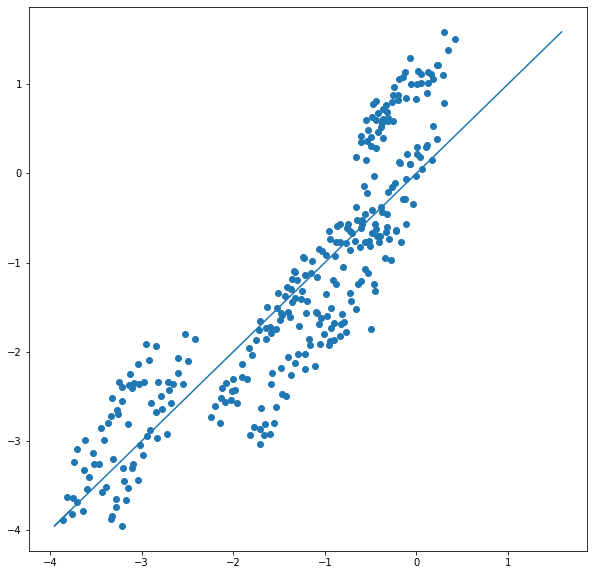

In [27]:
plt.figure(figsize=(10,10))
plt.plot(y,y)
plt.scatter(x, y)
plt.show